## Imports and Downloads

In [3]:
# !pip install PyMuPDF

In [4]:
# ! pip uninstall fitz

In [5]:
# ! pip install opencv-python

In [1]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Any
import os
import io
from PIL import Image, ImageDraw, ImageFont
import IPython.display as display
import re
import fitz  # PyMuPDF
import json

## Working Functions

### PDF, IMG func

In [2]:
def save_image(new_image: Image.Image, file_path: str) -> None:
    """
    Save the given image to a file.

    :param new_image: The image to save.
    :param file_path: The path where to save the image.
    """
    new_image.save(file_path)


In [3]:
def pdf_to_img_old_working(pdf_path: str, output_folder: str):
    doc = fitz.open(pdf_file)
    for page_number in range(len(doc)):
        page = doc.load_page(page_number)  # corrected method name
        img = page.get_pixmap()
        img.save(os.path.join(output_folder, f'page_{page_number + 1}.png'))
    

In [4]:
def pdf_to_img(pdf_path: str, output_folder: str, only_create: bool = True) -> List[Image.Image]:
    os.makedirs(output_folder, exist_ok=True)

    doc = fitz.open(pdf_path)
    images = []
    for page_number in range(len(doc)):
        
        page = doc.load_page(page_number)
        img = page.get_pixmap()
        image_data = img.samples  # get image data
        image = Image.frombytes("RGB", [img.width, img.height], image_data)
        images.append(image)
        image.save(os.path.join(output_folder, f'page_{page_number + 1}.png'))
    if only_create: 
        return None
    return images

### OCR

In [5]:
def read_txt_from_image_path(image_path) -> str:
    image = Image.open(image_path)
    
    image_np = np.array(image)
    
    reader = easyocr.Reader(['de'], gpu=True)
    
    result = reader.readtext(image_np, paragraph=False)
    return result

In [6]:
def read_txt_from_image(image) -> str:
        
    image_np = np.array(image)
    
    reader = easyocr.Reader(['de'], gpu=True)
    
    result = reader.readtext(image_np, paragraph=False)
    return result

In [7]:
def extract_txt_from_reader_output(output_reader: str) -> str:
    extracted_text = ""
    for detection in output_reader:
        text = detection[1]
        extracted_text += text + " "
    return extracted_text


In [8]:
def print_output(output_with_coordinates: str) -> None:
    pass

### Find the values

In [9]:
def seaerch_for_keys(keys: List[str], str_output: str) -> Dict[str, any]: 
    result = {}
    # ToDo find the values that come after the key
    for key in keys:
        result[key] = "test"
    return result

In [10]:
def draw_output_to_image(ocr_results: str , save_location: str = '../data/output_images/test.png' ,save: bool = False):
    image_width = 2000  
    image_height = int(np.round(2000 * 1.4142))  

    font_path = "C:/Users/horva/anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf"
    font = ImageFont.truetype(font_path, 20)  # You may need to adjust the font size

    # Create a new white image
    new_image = Image.new('RGB', (image_width, image_height), 'white')
    draw = ImageDraw.Draw(new_image)

#     # OCR results
#     ocr_results = read_txt_from_image_path('./output_images_test_2/page_1.png')

    for result in ocr_results:
        coords = result[0]
        text = result[1]
        # Get the bounding box coordinates
        top_left = coords[0]
        bottom_right = coords[2]
        # Draw text
        draw.text(top_left, text, (0, 0, 0), font=font)  

    if save:
        save_image(new_image, save_location)
    display.display(new_image)
    

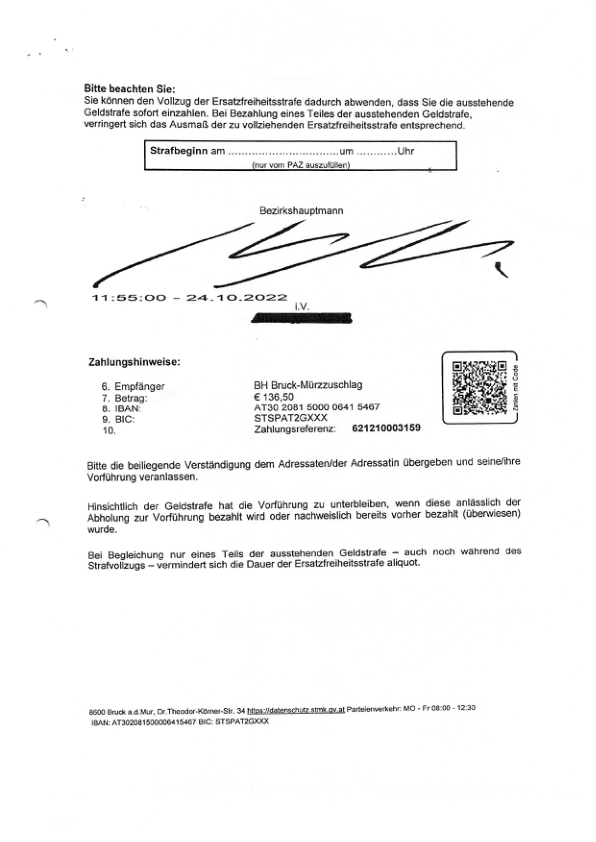

In [12]:
images = pdf_to_img( "../data/2-Batch/1-Doc.pdf", "../data/2-Batch/1_Doc_output/", False)
images[1]

In [14]:
read_txt_from_image(images[0])

[([[420, 76], [524, 76], [524, 104], [420, 104]],
  'Das Land',
  0.9834118679440887),
 ([[90, 118], [340, 118], [340, 126], [90, 126]],
  'JezRKstaupimannschaFigruck hurzzusChia',
  0.00762597006876316),
 ([[414, 108], [526, 108], [526, 132], [414, 132]],
  'Steiermark',
  0.9996098265361518),
 ([[397, 143], [473, 143], [473, 157], [397, 157]],
  'STRAFWESEN',
  0.9495049466782595),
 ([[128, 156], [156, 156], [156, 164], [128, 164]],
  '@unt',
  0.06315610557794571),
 ([[168, 164], [228, 164], [228, 172], [168, 172]],
  '060) Hruchaavui',
  0.08713268259018768),
 ([[384, 164], [428, 164], [428, 172], [384, 172]],
  'Boaneltori',
  0.5517452381523109),
 ([[384, 174], [430, 174], [430, 180], [384, 180]],
  'Icl 441 1557',
  0.15804181164310926),
 ([[418, 182], [448, 182], [448, 188], [418, 188]],
  '{hano',
  0.03357118830608652),
 ([[406, 190], [468, 190], [468, 198], [406, 198]],
  'phbrosuirF BL',
  0.0173390430817891),
 ([[90, 214], [154, 214], [154, 222], [90, 222]],
  '1140 en Per

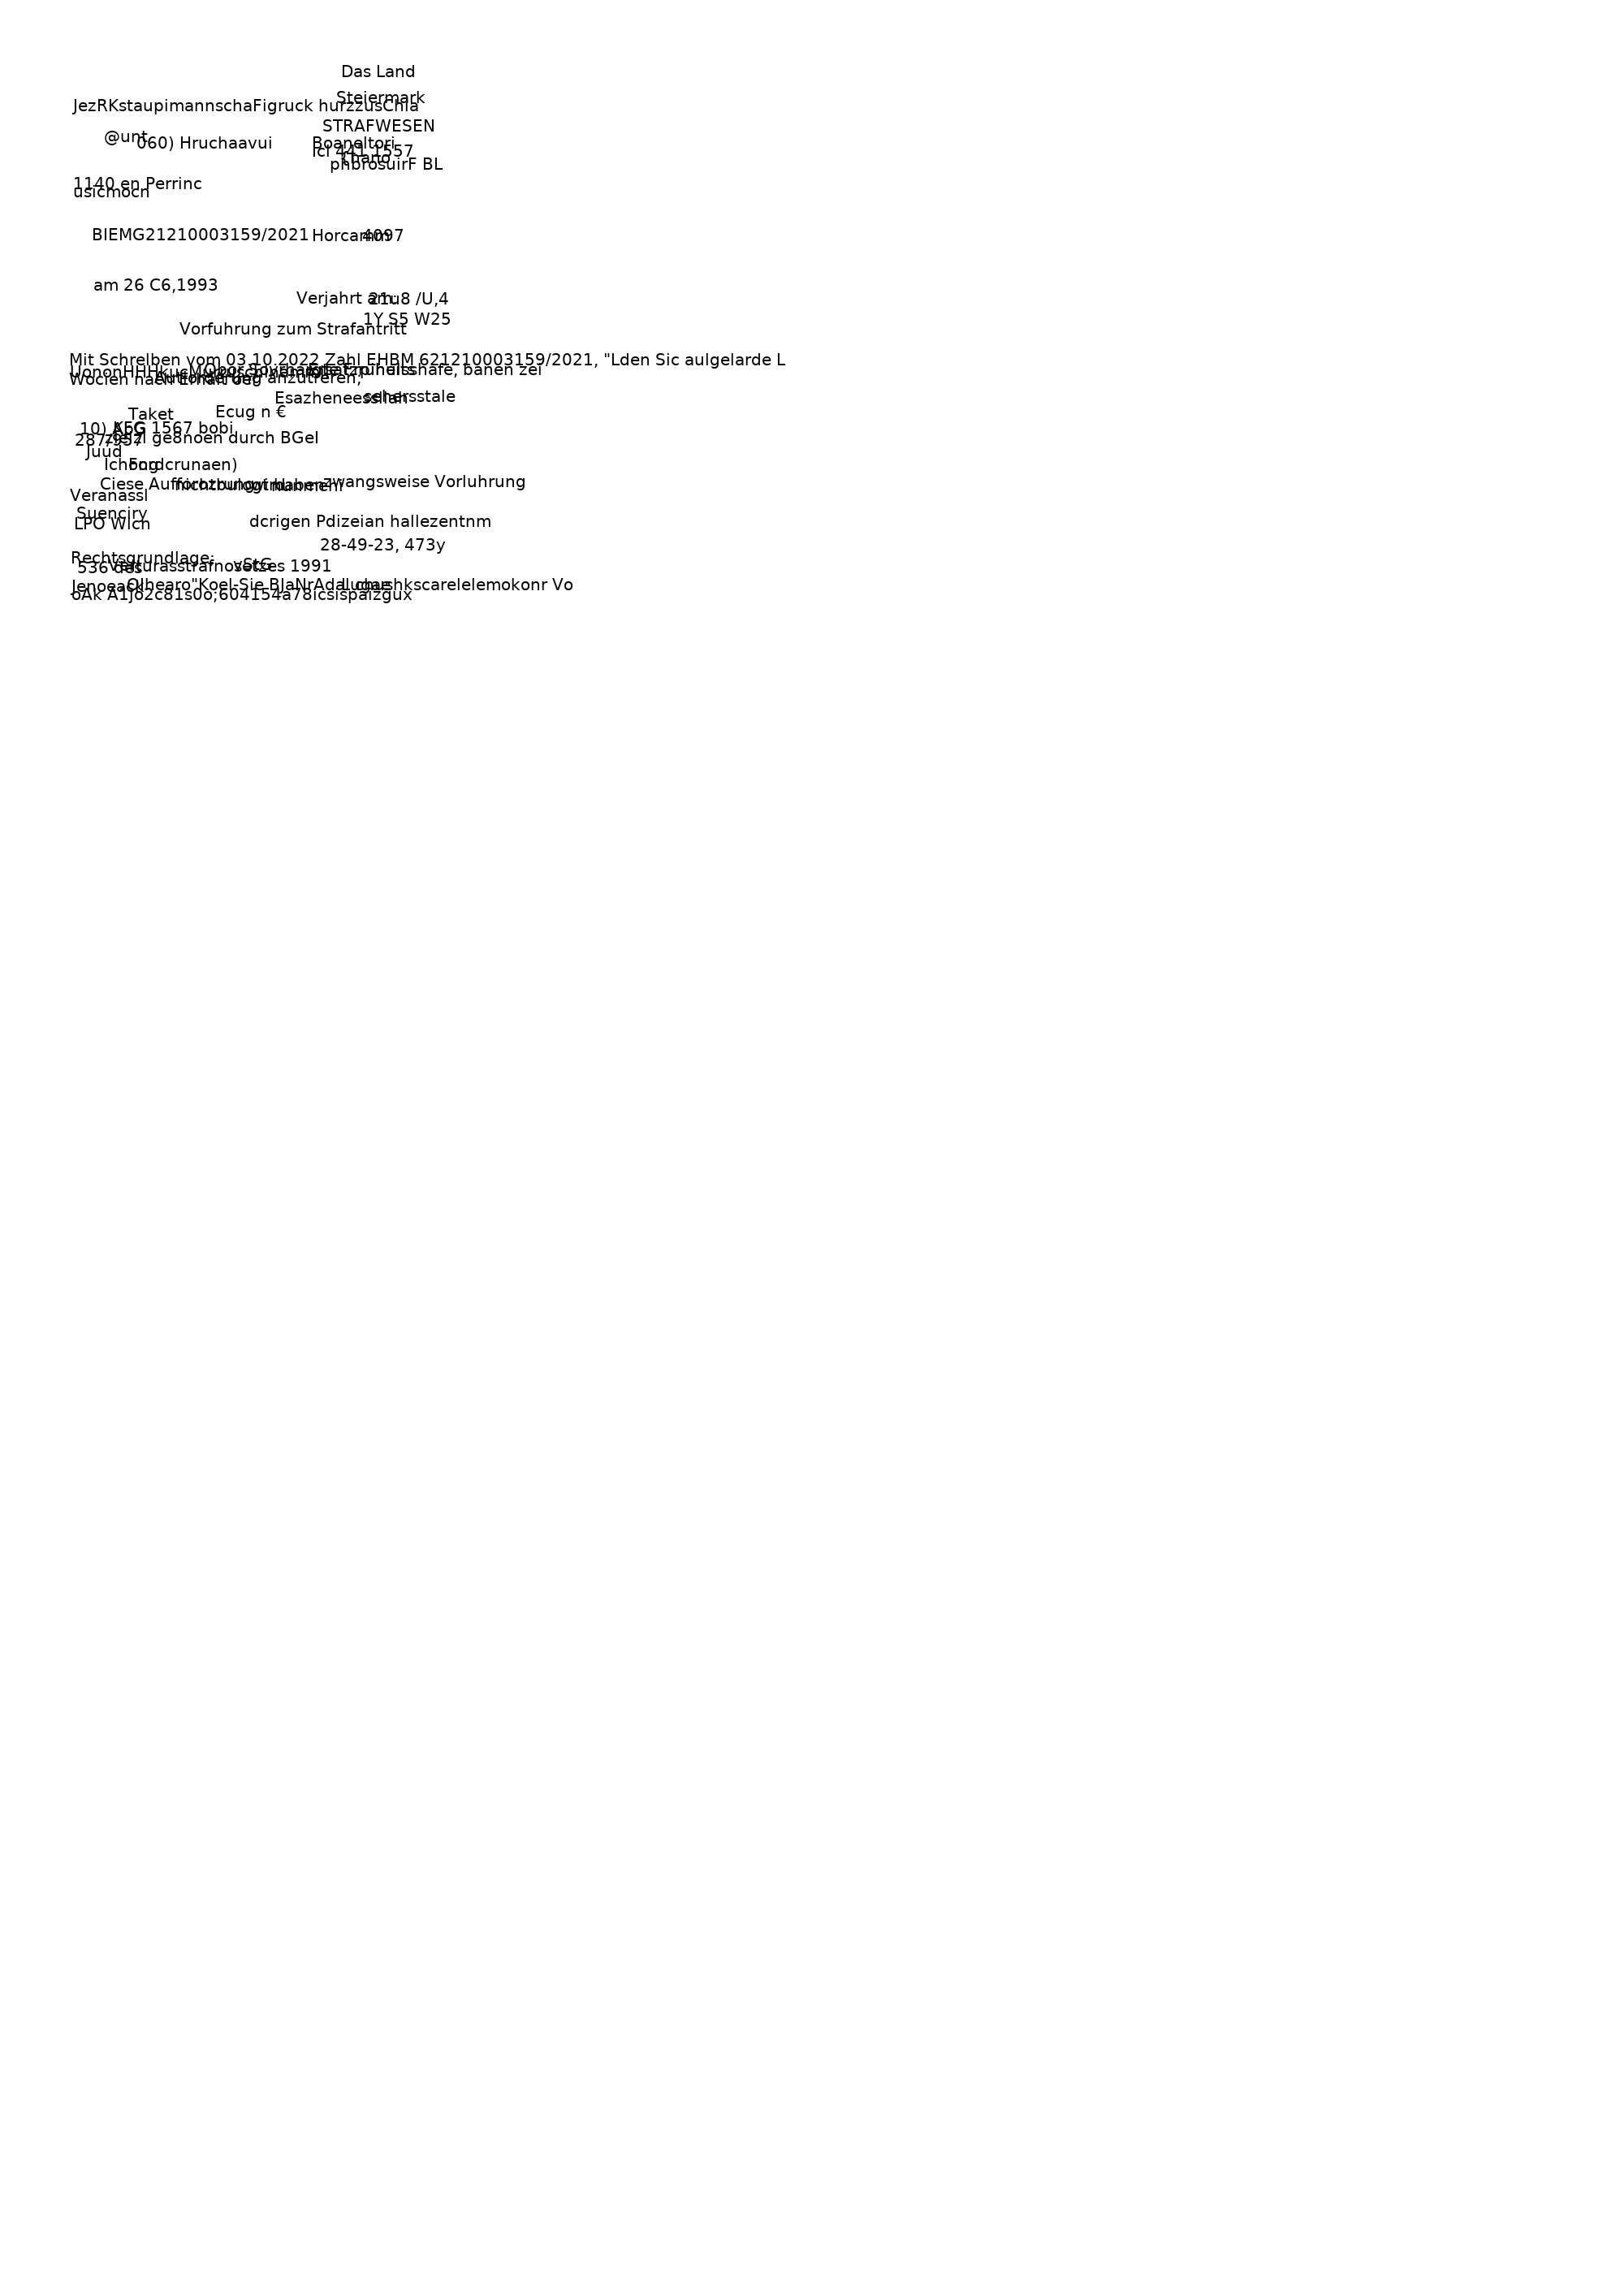

In [15]:
draw_output_to_image(read_txt_from_image(images[0]), "../data/2-Batch/1_Doc_output/page_clean_1.png", True)

### save

In [11]:
def save_string_to_txt(content, filename, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'w') as file:
        file.write(content)

## Run

In [12]:
def read_in_new_penalty(pdf_path: str, output_folder_str: str):
    images = pdf_to_img(pdf_path=pdf_path, output_folder=output_folder_str, only_create=False)
    result: str = ""
    print(f"File has {len(images)} pages")
    for i, image in enumerate(images):
        result += extract_txt_from_reader_output(read_txt_from_image(image))
        print(f"currently reading page {i}.")
    save_string_to_txt(result, "output_ocr.txt", output_folder_str)
    print(result)

In [14]:
read_in_new_penalty('../data/1-Batch/1_Doc.pdf', '../data/1-Batch/1_Doc_output/')

File has 2 pages
currently reading page 0.
currently reading page 1.
Kone BEZIRKSHAUPTMANNSCHAFT BADEN Fachgebiet Strafen 2500 Baden, Schwartzstraße 50 Marksheupttaonrchal Bedan Z500 Kerrn 1230 Wien Llusing Ell: ton Eronconssn B62ar Far 027528025-2234- BD*74nCe; 027423005-9005 BNSZ-V-22 73325/3 Internal mm ndC Qv 01 Mmnou Dsaddacnschutz Kennzcichen (ci Antwort bine anzede 7] 52) 0025 uM Cuchoani Beailtuzq 71o 22347 12.09,2023 Bewnin Autforderung zum Antritt der Ersatzfreiheitsstrafe Aul Grund des Strafescheides vom 09.12 2022, Zahl BNS2-V-22 73326/3. Ise noch tolgende gegen Sle rechtskranig verhangte (Rost-)Strate volistrecken: Ockaim 0 Erpolzsohonsstrala Ucai Veljno 103 Abs. 134 Ad5 KFG 1967 225,00 22 Stunden Oftene Geldstrale gosamt: 225,00 Offono Ersatzfreiheitsstrafo gesamt: 22 Stunden donkocon Hoc Vananfens Mahnoejunren Auilordomgind noCi 0le Dollreo Exekutionskosten Im Ausmaß von Hohe von 00 sowie Barauslagen von 67,50 bezahlen Offener Gesamtbetrag Geldstrafe inkl. Kostcn); 297,5

In [13]:
 read_in_new_penalty('../data/2-Batch/1-Doc.pdf', '../data/2-Batch/1_Doc_output/')

File has 3 pages
currently reading page 0.
currently reading page 1.
currently reading page 2.
Das Land JezRKstaupimannschaFigruck hurzzusChia Steiermark STRAFWESEN @unt 060) Hruchaavui Boaneltori Icl 441 1557 {hano phbrosuirF BL 1140 en Perrinc usicmocn Horcamm 4097 BIEMG21210003159/2021 am 26 C6,1993 Verjahrt am: 21u8 /U,4 1Y S5 W25 Vorfuhrung zum Strafantritt Mit Schrelben vom 03.10.2022 Zahl EHBM 621210003159/2021, "Lden Sic aulgelarde L UononHHHkucMurruschinammil Obor Sovrhargte Frpiheits Ersatzruhulsshafe, banen zei Wocien nach Erhalt oer Autiorderung anzutreren; Esazheneessllah sehersstale Taket Ecug n € 10) AbG KFG 1567 bobi 287/957 zlelzl ge8noen durch BGeI Juud Ichong Fordcrunaen) Ciese Aufforozrung nichtbulogt haben wird nunmehi zwangsweise Vorluhrung Veranassl Suenciry LPO Wlcn dcrigen Pdizeian hallezentnm Rechtsgrundlage; 28-49-23, 473y 536 des Iturasstrafnosetzes 1991 vStG Jenoeack OIhearo"Koel-Sie BJaNrAdal chushkscarelelemokonr Vo Lugae oAk A1jo2c81s0o;604154a78icsispai

## Test Area

In [19]:
def find_nearest_GZ(data):
    # Helper function to calculate the center of a bounding box
    def calculate_center(bbox):
        return [(bbox[0][0] + bbox[1][0]) / 2, (bbox[0][1] + bbox[3][1]) / 2]

    # Finding the bounding box coordinates of 'GZ:'
    gz_bbox = next((bbox for bbox, text, _ in data if text == 'GZ:'), None)
    if gz_bbox is None:
        return None  # 'GZ:' not found in data
    
    # Initializing a list to store distances and text information
    distances_include_slash = []
    
    for bbox, text, _ in data:
        if len(text) > 10 and ' ' not in text and '/' in text:
            center = calculate_center(bbox)
            gz_center = calculate_center(gz_bbox)
            distance = np.sqrt((center[0] - gz_center[0]) ** 2 + (center[1] - gz_center[1]) ** 2)
            distances_include_slash.append((distance, text, bbox))
    
    # Sorting the distances to find the nearest text element that meets all the criteria
    nearest_text_include_slash = sorted(distances_include_slash, key=lambda x: x[0])[0] if distances_include_slash else None
    return nearest_text_include_slash




In [20]:
def search_for_keys(keys: List[str], str_output: str) -> Dict[str, Any]:
    result = {}
        
    for key in keys:
        if key == "GZ":
            match = re.search(r'GZ\s*:?\s*(\S+)', str_output)
        elif key == "Verjährt":
            match = re.search(r'Verjährt am:\s*(\d{2}\.\d{2}\.\d{4})', str_output)
#         else:
#             # Default pattern: captures any word characters following the key
#             pattern = re.compile(rf"{re.escape(key)}.*?:(.*?)\n")
        
#         match = pattern.search(str_output)

        if match:
            result[key] = match.group(1)
        else:
            result[key] = None  # No match found for this key
    
    return result




In [21]:
data_reader_output_1 = read_txt_from_image_path('../data/output_images/Strafverfugung-1_clean.png')
data_reader_output_2 = read_txt_from_image_path('../data/output_images/Strafverfugung-2_clean.png')

result = find_nearest_GZ(data_reader_output_1)
result

result = find_nearest_GZ(data_reader_output_2)
result

(208.08652046684813,
 'MBA/210000072407/2021',
 [[366, 627], [636, 627], [636, 653], [366, 653]])

In [24]:
extract_txt_from_reader_output(read_txt_from_image_path("../data/1-Batch/1_Doc_output/page_1.png") )

'Kone BEZIRKSHAUPTMANNSCHAFT BADEN Fachgebiet Strafen 2500 Baden, Schwartzstraße 50 Marksheupttaonrchal Bedan Z500 Kerrn 1230 Wien Llusing Ell: ton Eronconssn B62ar Far 027528025-2234- BD*74nCe; 027423005-9005 BNSZ-V-22 73325/3 Internal mm ndC Qv 01 Mmnou Dsaddacnschutz Kennzcichen (ci Antwort bine anzede 7] 52) 0025 uM Cuchoani Beailtuzq 71o 22347 12.09,2023 Bewnin Autforderung zum Antritt der Ersatzfreiheitsstrafe Aul Grund des Strafescheides vom 09.12 2022, Zahl BNS2-V-22 73326/3. Ise noch tolgende gegen Sle rechtskranig verhangte (Rost-)Strate volistrecken: Ockaim 0 Erpolzsohonsstrala Ucai Veljno 103 Abs. 134 Ad5 KFG 1967 225,00 22 Stunden Oftene Geldstrale gosamt: 225,00 Offono Ersatzfreiheitsstrafo gesamt: 22 Stunden donkocon Hoc Vananfens Mahnoejunren Auilordomgind noCi 0le Dollreo Exekutionskosten Im Ausmaß von Hohe von 00 sowie Barauslagen von 67,50 bezahlen Offener Gesamtbetrag Geldstrafe inkl. Kostcn); 297,50 Annahme besteht; dass die Geldstrafe uneinbringlich ist, muss nunm

In [25]:
data_reader_output_1


[([[439, 291], [673, 291], [673, 323], [439, 323]],
  'Landespolizeidirektion',
  0.9998316286215032),
 ([[450, 384], [507, 384], [507, 408], [450, 408]],
  'Wien',
  0.9999814033508301),
 ([[1395, 418], [1579, 418], [1579, 447], [1395, 447]],
  'Wien, 25.09.2023',
  0.975489143690344),
 ([[466, 453], [742, 453], [742, 479], [466, 479]],
  'VStVI923301717500/2023',
  0.6639238697484494),
 ([[365, 485], [407, 485], [407, 506], [365, 506]], 'GZ:', 0.9987714280557417),
 ([[1396, 519], [1731, 519], [1731, 543], [1396, 543]],
  'Polizeikommissariat Innere Stadt',
  0.8548259278762447),
 ([[360, 548], [717, 548], [717, 574], [360, 574]],
  'Retouren an: W 01 PK Innere Stadt',
  0.8589734419359498),
 ([[514, 573], [867, 573], [867, 602], [514, 602]],
  'Deutschmeisterplatz 3, 1010 Wien',
  0.6174460714466179),
 ([[1398, 574], [1495, 574], [1495, 600], [1398, 600]],
  'Referat 2',
  0.9995678594269047),
 ([[1564, 561], [1692, 561], [1692, 592], [1564, 592]],
  'Strafvollzug',
  0.7902330751702

In [17]:
pdf_file = '../data/Strafvollzugsordnung_1.pdf'
output_folder = 'output_images_test_1'

In [18]:
test_output = extract_txt_from_reader_output(read_txt_from_image_path('../data/output_images/Strafverfugung-1_clean.png'))

In [19]:
test_output_2 = extract_txt_from_reader_output(read_txt_from_image_path('../data/output_images/Strafverfugung-2_clean.png'))

In [20]:
test_output_2 = extract_txt_from_reader_output(read_txt_from_image_path('../data/output_images/Polizi_Strafe-2.png'))

In [21]:
keys = ["GZ", "Verjährt"]
output = search_for_keys(keys, test_output_2)
print(output)

{'GZ': 'MBA/210000072407/2021', 'Verjährt': '23.11.2024'}


In [22]:
test_output

'Landespolizeidirektion Wien Wien, 25.09.2023 VStVI923301717500/2023 GZ: Polizeikommissariat Innere Stadt Retouren an: W 01 PK Innere Stadt Deutschmeisterplatz 3, 1010 Wien Referat 2 Strafvollzug pk-w-Oil-kanzlei@polizeigvat Herr Tel: +43 1 31 310 21140 1140 Wlen Penzing Fax: +43 1 31 310 21109 Deutschmeisterplatz 3, 1010 Wien 25.08 2026 Freiheits-lErsatzfreiheitsstrafe Aufforderung zum Antritt der ist folgende offene Strafe zu VStVI923301717500/2023 Aus der Strafverfügung vom 18.09.2023- Freiheitsstrafe vollstrecken: Ersatzfreiheitsstrafe Std_ Betrag in € Tage Std_ Min Delikt 1 FSG, i.d.F. BGBI Nr $ 37 Abs_ Abs_ 3 FSG, BGBI 81/2002 i.Vm. Nr. 120/1997 zuletzt geändert durch 400,00 16 Nr. 74/2015 BGBL Kraftfahrgesetz 1967 KFG $ 102 Abs_ 1967 BGBI Nr. 267/1967 zuletzt 400,00 16 geändert durch BGBI. Nr. 35/2023 800,00 Gesamt (offene Forderungen) Offene Kosten gesamt: € 0,00 sich somit ein off 25.09.2023 ergibt etwaiger   Teilzahlungen per Unter Berücksichtigung (Geldsirafe inki: Kosten) i

In [23]:
test_output_2

'GZ: MBA/210000072407/2021 Wien, 27.04.2023 Bearbeiterlin: € Retouren an: Magistratsabteilung 6 BA 32 Rinnbockstraße 15/Block A1. und 2/EG, 1110 Wien Magistrat dor Stadt Wien Magistratsabteilung 6 BA 32 Rinnböckslraße 15, Block A; 1. 2., EG Wien 08 PK Polizeiliche Verbindungsstelle JA Josefstadt 1110 Wien Wickenburggasse 18-22/5 Osterreich 1080 Wien Tel: +43 1 4000 89830 Fax: +43 14000 9989830 E-Mail: kanzlei-b32@ma06.wien gv.at Inlernet: wien gv.at Verjährt am: 23.11.2024 Strafvollzugs-Anordnung (Ersuchen um Vollzug) whft. ins 1210, Gegen_ wurde mit rechtskräftiger Strafverfügung vom 03.11.2021, GZ: Wien Floridsdorf , MBA/21000CO72407/2021 wegen Übertretung(en) nach Strafausmaß Delikt Stunden Minuten Betrag in € Tage 5 20 Abs 7iVm. $S 10 Abs 12 550,00 und 11 Abs. 1 BStMG 12 550,00 Strafen Gesamt verhängt Davon sind per 27.04,.2023 noch folgende Strafen offen: 0 Minuten € 550,00 0 Tage 12 Stunden Reshtsgsundlegealtungsstrafgesetz 1991 VStG Da die Geldstrafe uneinbringlich ist; wird um 

In [24]:
test_output_without_par = extract_txt_from_reader_output(read_txt_from_image_path('../data/output_images/Polizi_Strafe-2.png'))

In [30]:
def extract_data(text):
    # Define regex patterns for each label
    name_pattern = re.compile(r"Herr (\w+ \w+)")
    behorde_pattern = re.compile(r"(Landespolizeidirektion Wien)")
    gz_vorfuhrende_pattern = re.compile(r"GZ: (\w+/[\d]{4})")
    gz_strafende_pattern = re.compile(r"Strafverfügung vom [\d]{2}.\d{2}.\d{4}, (\w+/[\d]{4})")
    verjahrung_pattern = re.compile(r"VVJ: (\d{2}.\d{2} \d{4})")
    ersatzfreiheitsstrafe_pattern = re.compile(r"Gesamt \(offene Forderungen\) (\d+)")
    freiheitsstrafe_pattern = re.compile(r"KFG 1967, BGBI Nr. 267/1967 zuletzt \d{3},(\d+) geändert durch")
    offene_strafen_pattern = re.compile(r"Gesamtbetrag € (\d+,\d+)")
    sonstige_kosten_pattern = re.compile(r"Sonstige Kosten: Es wird ersucht; die Kosteneintreibung zu versuchen  €(\d+,\d+)")

    # Extract data from text
    name = name_pattern.search(text).group(1) if name_pattern.search(text) else None
    behorde = behorde_pattern.search(text).group(1) if behorde_pattern.search(text) else None
    gz_vorfuhrende = gz_vorfuhrende_pattern.search(text).group(1) if gz_vorfuhrende_pattern.search(text) else None
    gz_strafende = gz_strafende_pattern.search(text).group(1) if gz_strafende_pattern.search(text) else None
    verjahrung = verjahrung_pattern.search(text).group(1) if verjahrung_pattern.search(text) else None
    ersatzfreiheitsstrafe = int(ersatzfreiheitsstrafe_pattern.search(text).group(1)) if ersatzfreiheitsstrafe_pattern.search(text) else None
    freiheitsstrafe = int(freiheitsstrafe_pattern.search(text).group(1)) if freiheitsstrafe_pattern.search(text) else None
    offene_strafen = float(offene_strafen_pattern.search(text).group(1).replace(',', '.')) if offene_strafen_pattern.search(text) else None
    sonstige_kosten = float(sonstige_kosten_pattern.search(text).group(1).replace(',', '.')) if sonstige_kosten_pattern.search(text) else None

    
    # Construct the JSON structure
    data = {
        "Name": name,
        "Geburtsdatum": None,
        "Behörde": behorde,
        "Geschäftszahl (Vorführende Behörde)": gz_vorfuhrende,
        "Geschäftszahl (Strafende Behörde)": gz_strafende,
        "Verjährung": verjahrung,
        "Ersatzfreiheitsstrafe": {
            "Tage": ersatzfreiheitsstrafe,
            "Stunden": None,
            "Minuten": None
        },
        "Freiheitsstrafe": {
            "Tage": freiheitsstrafe,
            "Stunden": None,
            "Minuten": None
        },
        "Offene Strafen (in €)": offene_strafen,
        "sonstige Kosten (in €)": sonstige_kosten
    }
    return data

# Sample usage
text = """Landespolizeidirektion Wien Wien, 25.09.2023 GZ: VStVI923301717500/2023 Polizeikommissariat Innere Stadt Retouren an: W 01 PK Innere Stadt Strafvollzug Deutschmeisterplatz 3, 1010 Wien Referat 2 pk-w-0i1-kanzlei@polizeigvat Herr Paul Wenth, 5 4425 1140 Wlen Penzing Tel: +43 1 31 310 - 21140 Fax: +43 1 31 310 - 21109 Deutschmeisterplatz 3, 1010 Wien VVJ: 25.08 2026 Dlenslnummcr 90215544 Aufforderung zum Antritt der Freiheits-IErsatzfreiheitsstrafe ist folgende offene Strafe zu Aus der Strafverfügung vom 18.09.2023, VStVI923301717500/2023 vollstrecken: Ersatzfreiheitsstrafe Freiheitsstrafe Std. Min Tage Std. Min. Delikt Betrag in € $ 37 Abs. 1 FSG, i.d.F. BGBI Nr. 81/2002 i.V.m. $ Abs. 3 FSG, BGBI. Nr. 120/1997, zuletzt geändert durch 400,00 16 BGBL Nr. 74/2015 $ 102 Abs. 4 Kraftfahrgesetz 1967 KFG 1967, BGBI Nr. 267/1967 zuletzt 400,00 16 geändert durch BGBI. Nr. 35/2023 800,00 9 8 Gesamt (offene Forderungen) Offene Kosten gesamt: € 0,00 25.09.2023 ergibt sich   somit   ein offener Unter Berücksichtigung etwaiger   Teilzahlungen per (Geldsirafe inki: Kosten) in der Höhe von: Gesamtbetrag € 800,00 dass die Geldstrafe uneinbringlich   ist; muss nunmehr   die Da Grund ZU der   Annahme besteht; Ersatzfreiheitsstrafe vollstreckt werden innerhalb von zwei Wochen nach Erhalt dieses Schreibens im Wir fordern Sie auf, die Strafe Polizeianhaltezentrum Wien Roßauer Lände 1090 Wien, Roßauer Lände 7-9 Tel.: +43 1 31 310-30510 Version: 08.08.2022 Seite 1 von 2 VStVF 05 Aufforderung zum Antritt der Ersatzfreiheitsstrafe Tage Teils der ausstehenden Geldstrafe  auch noch während des Bei Begleichung nur eines Ersatzfreiheitsstrafe aliquot. Strafvollzugs vermindert sich die Dauer der Sonstige Kosten: Es wird ersucht; die Kosteneintreibung zu versuchen  €5,00 Mahngebühr Mahngebühr Strafen € 5,00 Offene Kosten per 27.04.2023 Offen Gesamt (Geldstrafe inkl. Kosten): 555,00 An das PAZ Anschlussvollzug (mit Beilage) 210000072407 Bei E-Banking unbedingt Zahlungsrererenzg in Euro: 555,00 angeben ; IBAN: AT131200010022813611 p BKAUATW BIC; Stadt Wien "MA 6 - BA 32, Empfanger: Strafen" f elektronisch gefertigt Für die Abteilungsleiterin Montag, Dienstag; Donnerstag und Freitag von 08:00 15:00 Uhr nur nach telefonischer Vereinbarung;am Kundkanseiegkcheiligentagmienstag Donnsrsvageno7.€zavon 08.00 11.00 Uhr nur nach lelefonischer Vereinbarung. Karreitag """  # Your long text goes here
result = extract_data(text)
print(json.dumps(result, indent=4, ensure_ascii=False))


{
    "Name": "Paul Wenth",
    "Geburtsdatum": null,
    "Behörde": "Landespolizeidirektion Wien",
    "Geschäftszahl (Vorführende Behörde)": "VStVI923301717500/2023",
    "Geschäftszahl (Strafende Behörde)": "VStVI923301717500/2023",
    "Verjährung": "25.08 2026",
    "Ersatzfreiheitsstrafe": {
        "Tage": null,
        "Stunden": null,
        "Minuten": null
    },
    "Freiheitsstrafe": {
        "Tage": null,
        "Stunden": null,
        "Minuten": null
    },
    "Offene Strafen (in €)": 800.0,
    "sonstige Kosten (in €)": 5.0
}


{
    "Name": null,
    "Geburtsdatum": null,
    "Behörde": "BEZIRKSHAUPTMANNSCHAFT BADEN",
    "Geschäftszahl (Vorführende Behörde)": "BNSZ-V-22 73325/3",
    "Geschäftszahl (Strafende Behörde)": "BNS2-V-22 73326/3",
    "Verjährung": null,
    "Ersatzfreiheitsstrafe (Tage/Stunden/Minuten)": {
        "Tage": 0,
        "Stunden": 22,
        "Minuten": 0
    },
    "Freiheitsstrafe (Tage/Stunden/Minuten)": {
        "Tage": null,
        "Stunden": null,
        "Minuten": null
    },
    "Offene Strafen (in €)": "€225,00",
    "Sonstige Kosten (in €)": "€67,50"
}


{
    "Name": null,
    "Geburtsdatum": null,
    "Behörde": "Landespolizeidirektion Wien",
    "Geschäftszahl (Vorführende Behörde)": "VStVI923301717500/2023",
    "Geschäftszahl (Strafende Behörde)": null,
    "Verjährung": "25.08.2026",
    "Ersatzfreiheitsstrafe (Tage/Stunden/Minuten)": {
        "Tage": 9,
        "Stunden": 8,
        "Minuten": 0
    },
    "Freiheitsstrafe (Tage/Stunden/Minuten)": {
        "Tage": null,
        "Stunden": null,
        "Minuten": null
    },
    "Offene Strafen (in €)": "€800,00",
    "Sonstige Kosten (in €)": "€5,00"
}
